<a href="https://colab.research.google.com/github/AlaaElnakeeb81536/Bosla-Project/blob/main/Face_recognition_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import os
from os import listdir
from PIL import Image
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
import numpy as np
import tensorflow as tf

import pickle
import cv2

In [33]:
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [34]:
pip install keras-facenet

In [35]:
import cv2

In [36]:
from keras_facenet import FaceNet
MyFaceNet = FaceNet()

In [37]:
folder='/content/fotoPeserta/'
database = {}

for filename in listdir(folder):

    path = folder + filename
    gbr1 = cv2.imread(folder + filename)

    wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)

    if len(wajah)>0:
        x1, y1, width, height = wajah[0]
    else:
        x1, y1, width, height = 1, 1, 10, 10

    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Image.fromarray(gbr)                  # konversi dari OpenCV ke PIL
    gbr_array = asarray(gbr)

    face = gbr_array[y1:y2, x1:x2]

    face = Image.fromarray(face)
    face = face.resize((160,160))
    face = asarray(face)



    face = expand_dims(face, axis=0)
    signature = MyFaceNet.embeddings(face)

    database[os.path.splitext(filename)[0]]=signature

1/1 [==============================] - 0s 171ms/step


In [38]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))

  filename=findFaces(data)

  return filename


In [39]:
myfile = open("data.pkl", "wb")
pickle.dump(database, myfile)
myfile.close()

In [40]:
myfile = open("data.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [41]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [42]:
def findFaces(data):
  gbr1 = js_to_image(data)
  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
  gbr_array = asarray(gbr)

  wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)

  for (x1,y1,w,h) in wajah:
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + w, y1 + h

      face = gbr_array[y1:y2, x1:x2]

      face = Img.fromarray(face)
      face = face.resize((160,160))
      face = asarray(face)



      face = expand_dims(face, axis=0)
      signature = MyFaceNet.embeddings(face)

      min_dist=100
      identity=' '
      for key, value in database.items() :
        dist = np.linalg.norm(value-signature)
        if dist < min_dist:
          min_dist = dist
          identity = key

      cv2.putText(gbr1,identity, (x1,y1),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)
      cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,255,0), 2)

  filename='photo.jpg'
  cv2.imwrite(filename, gbr1)

  return filename

In [43]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))

  filename=findFaces(data)

  return filename


In [ ]:
try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))

    # Call findface() function on the taken photo
    findFaces(filename)

except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saved to photo.jpg


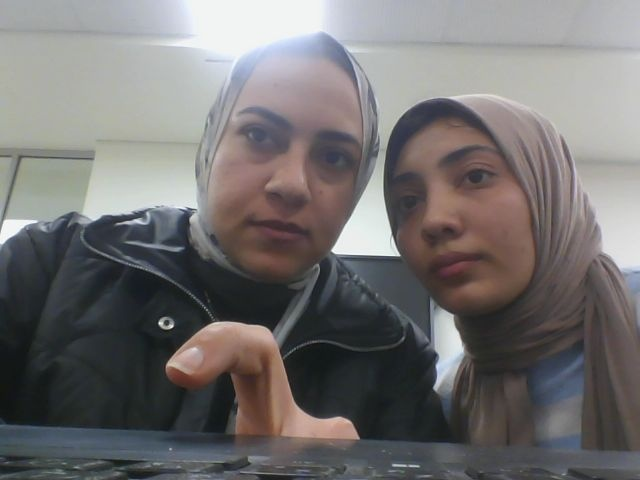

No face detected in the image. Cannot open Facebook profile.


In [45]:
from IPython.display import Image, display
import cv2
import os
import webbrowser

# Function to detect face using OpenCV
def detect_face(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    if len(faces) > 0:
        return True
    return False

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))

    # Check if a face is detected
    if detect_face(filename):
        # Open Facebook URL
        facebook_url = "https://www.facebook.com"
        webbrowser.open_new_tab(facebook_url)
        print("Opening Facebook profile...")
    else:
        print("No face detected in the image. Cannot open Facebook profile.")
except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))
